In [30]:
import pandas as pd

In [31]:
kor_ticker = pd.read_pickle("./data/kor_ticker.pkl")
kor_fs = pd.read_pickle("./data/kor_fs.pkl")
kor_price = pd.read_pickle("./data/kor_price.pkl")
kor_sector = pd.read_pickle("./data/kor_sector.pkl")
kor_value = pd.read_pickle("./data/kor_value.pkl")

- 각 팩터의 값들은 재무제표(value, quality)나 가격데이터(momentum)로 구해야 한다
- price data는 2017-08-07 ~ 2022-08-05 기간의 코스피 코스닥 종목들

In [49]:
kor_ticker

,종목코드,종목명,시장구분,종가,시가총액,기준일,EPS,선행EPS,BPS,주당배당금,종목구분
0,000020,동화약품,KOSPI,10600.0,2.960740e+11,2022-08-03,647.0,NaN,12534.0,180.0,보통주
1,000040,KR모터스,KOSPI,703.0,6.758530e+10,2022-08-03,NaN,NaN,385.0,0.0,보통주
2,000050,경방,KOSPI,12850.0,3.522860e+11,2022-08-03,872.0,NaN,30033.0,125.0,보통주
3,000060,메리츠화재,KOSPI,36150.0,4.222390e+12,2022-08-03,5768.0,6211.0,22086.0,620.0,보통주
4,000070,삼양홀딩스,KOSPI,72500.0,6.209100e+11,2022-08-03,30711.0,NaN,226314.0,3000.0,보통주
...,...,...,...,...,...,...,...,...,...,...,...
2508,950170,JTC,KOSDAQ,2700.0,9.451490e+10,2022-08-03,NaN,NaN,NaN,NaN,기타
2509,950190,미투젠,KOSDAQ,15650.0,2.125250e+11,2022-08-03,NaN,NaN,NaN,NaN,기타
2510,950200,소마젠,KOSDAQ,5950.0,1.141030e+11,2022-08-03,NaN,NaN,NaN,NaN,기타
2511,950210,프레스티지바이오파마,KOSPI,11900.0,7.151440e+11,2022-08-03,NaN,NaN,NaN,NaN,기타


In [34]:
kor_value[kor_value['종목코드'] == '000020']

,종목코드,기준일,지표,값
0,000020,2022-08-03,DY,0.0170
1,000020,2022-08-03,PBR,0.8314
2,000020,2022-08-03,PCR,6.7597
3,000020,2022-08-03,PER,14.9532
4,000020,2022-08-03,PSR,0.9660


In [43]:
value_table = pd.pivot_table(kor_value, index = '종목코드', columns = '지표').reset_index()
value_table.columns = ['종목코드', 'DY','PBR','PCR','PER','PSR']

In [45]:
value_table

,종목코드,DY,PBR,PCR,PER,PSR
0,000020,0.0170,0.8314,6.7597,14.9532,0.9660
1,000040,NaN,1.3430,-7.8588,-5.1989,0.4828
2,000050,0.0097,0.4666,9.8130,11.5126,0.8860
3,000060,0.0172,1.9039,3.8105,5.6745,NaN
4,000070,0.0414,0.2568,3.0723,2.6045,0.1923
...,...,...,...,...,...,...
2278,399720,NaN,4.7133,NaN,NaN,NaN
2279,402030,NaN,4.7133,4.7133,4.7133,4.7133
2280,402340,NaN,4.7133,4.7133,4.7133,4.7133
2281,403870,NaN,4.7133,4.7133,4.7133,4.7133


In [56]:
data_value = pd.merge(kor_ticker[['종목코드','종목명','시장구분']], value_table ,on='종목코드')
data_value

,종목코드,종목명,시장구분,DY,PBR,PCR,PER,PSR
0,000020,동화약품,KOSPI,0.0170,0.8314,6.7597,14.9532,0.9660
1,000040,KR모터스,KOSPI,NaN,1.3430,-7.8588,-5.1989,0.4828
2,000050,경방,KOSPI,0.0097,0.4666,9.8130,11.5126,0.8860
3,000060,메리츠화재,KOSPI,0.0172,1.9039,3.8105,5.6745,NaN
4,000070,삼양홀딩스,KOSPI,0.0414,0.2568,3.0723,2.6045,0.1923
...,...,...,...,...,...,...,...,...
2278,399720,가온칩스,KOSDAQ,NaN,4.7133,NaN,NaN,NaN
2279,402030,코난테크놀로지,KOSDAQ,NaN,4.7133,4.7133,4.7133,4.7133
2280,402340,SK스퀘어,KOSPI,NaN,4.7133,4.7133,4.7133,4.7133
2281,403870,HPSP,KOSDAQ,NaN,4.7133,4.7133,4.7133,4.7133


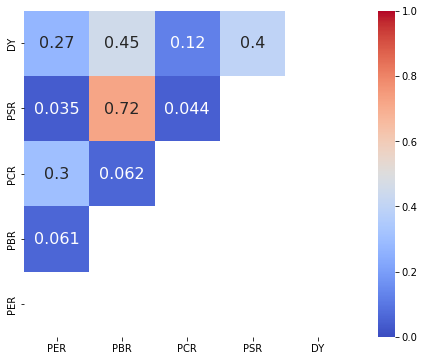

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

value_list_copy = data_value.copy()
value_list_copy['DY'] = 1 / value_list_copy['DY']
value_list_copy = value_list_copy[['PER', 'PBR', 'PCR', 'PSR', "DY"]]
value_rank_all = value_list_copy.rank(axis=0)
mask = np.triu(value_rank_all.corr())

mask = np.triu(value_rank_all.corr())
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(value_rank_all.corr(),
            annot=True,
            mask=mask,
            annot_kws={"size": 16},
            vmin=0,
            vmax=1,
            center=0.5,
            cmap='coolwarm',
            square=True)
ax.invert_yaxis()
plt.show()

- 팩터간 상관관계가 낮을 수록 good ~ 선형대수의 직교에 가까울 수록


In [60]:
value_sum_all = value_rank_all.sum(axis=1, skipna=False).rank()
data_value.loc[value_sum_all <= 20]

,종목코드,종목명,시장구분,DY,PBR,PCR,PER,PSR
68,001430,세아베스틸지주,KOSPI,0.0984,0.2923,-9.6454,2.9901,0.1400
110,002320,한진,KOSPI,0.0223,0.2871,2.1382,-32.6296,0.1511
162,003480,한진중공업홀딩스,KOSPI,0.0250,0.3339,1.0334,-9.5257,0.1102
225,005010,휴스틸,KOSPI,0.0382,0.3037,-820.0100,3.0944,0.2321
249,005720,넥센,KOSPI,0.0271,0.0938,2.6030,-11.1475,0.0803
267,006060,화승인더,KOSPI,0.0374,0.4259,-20.7657,-103.0593,0.1920
270,006120,SK디스커버리,KOSPI,0.0416,0.2238,-9.0424,1.9001,0.0909
497,016450,한세예스24홀딩스,KOSPI,0.0425,0.2516,-6.0933,3.0427,0.0786
524,017940,E1,KOSPI,0.0494,0.2208,-1.5958,1.9544,0.0531
535,018670,SK가스,KOSPI,0.0455,0.4882,-94.8431,3.0786,0.1394


# 밸류

In [77]:
value_rank = data_value[['PER', 'PBR']].rank(axis = 0)
value_sum = value_rank.sum(axis = 1, skipna = False).rank()
data_bind.loc[value_sum <= 20, ['종목코드', '종목명', 'PER', 'PBR']]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

# 모멘텀

In [62]:
kor_price

,날짜,시가,고가,저가,종가,거래량,종목코드
0,2017-08-07,8330.0,8410.0,8320.0,8380.0,35043.0,000020
1,2017-08-07,4836.0,4970.0,4783.0,4918.0,373437.0,000040
2,2017-08-07,15950.0,16150.0,15800.0,15950.0,26242.0,000050
3,2017-08-07,24300.0,24450.0,24150.0,24300.0,119111.0,000060
4,2017-08-07,116000.0,117500.0,114500.0,116000.0,8007.0,000070
...,...,...,...,...,...,...,...
2559956,2022-08-05,26600.0,26650.0,25750.0,26050.0,288182.0,399720
2559957,2022-08-05,27500.0,27750.0,26700.0,27150.0,170316.0,402030
2559958,2022-08-05,42300.0,42950.0,42000.0,42650.0,194975.0,402340
2559959,2022-08-05,53900.0,58800.0,53400.0,55500.0,408363.0,403870


In [69]:
price_pivot = pd.pivot_table(kor_price, index = '날짜', values='종가', columns='종목코드')
price_pivot

종목코드,000020,000040,000050,000060,000070,000080,000100,000120,000140,000150,...,389260,391710,396270,396300,397030,399720,402030,402340,403870,412350
날짜,,,,,,,,,,,,,,,,,,,,,
2017-08-07,8380.0,4918.0,15950.0,24300.0,116000.0,23650.0,36417.0,180000.0,11300.0,101224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,8330.0,4856.0,15650.0,24300.0,119000.0,23700.0,36980.0,172000.0,11200.0,102012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,8150.0,4783.0,15350.0,24450.0,120000.0,23500.0,36900.0,171000.0,11200.0,104375.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,8200.0,4759.0,15300.0,24100.0,120000.0,23800.0,36498.0,174000.0,11400.0,105163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-11,8130.0,4294.0,14850.0,24000.0,122500.0,23600.0,35936.0,168500.0,11150.0,103587.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,10400.0,725.0,13000.0,34100.0,74100.0,30150.0,57200.0,114500.0,11750.0,70700.0,...,19700.0,2640.0,12350.0,7280.0,21000.0,26400.0,26000.0,42450.0,54900.0,12400.0
2022-08-02,10250.0,711.0,12950.0,33850.0,72800.0,30700.0,56700.0,113500.0,11650.0,69800.0,...,20000.0,2630.0,11850.0,7430.0,19800.0,26600.0,25800.0,41200.0,53500.0,12100.0
2022-08-03,10600.0,703.0,12850.0,36150.0,72500.0,31250.0,56300.0,115500.0,11850.0,71100.0,...,18450.0,2605.0,11850.0,7820.0,21400.0,27050.0,25850.0,41800.0,54700.0,12500.0


In [72]:
ret_list = pd.DataFrame(data=(price_pivot.iloc[-1] / price_pivot.iloc[0]) - 1,
                        columns=['return'])

data_bind = kor_ticker[['종목코드', '종목명']].merge(ret_list, how='left', on='종목코드')

data_bind

,종목코드,종목명,return
0,000020,동화약품,0.288783
1,000040,KR모터스,-0.855632
2,000050,경방,-0.172414
3,000060,메리츠화재,0.491770
4,000070,삼양홀딩스,-0.363793
...,...,...,...
2508,950170,JTC,NaN
2509,950190,미투젠,NaN
2510,950200,소마젠,NaN
2511,950210,프레스티지바이오파마,NaN


In [73]:
momentum_rank = data_bind['return'].rank(axis=0, ascending=False)
data_bind[momentum_rank <= 20]

,종목코드,종목명,return
220,003670,포스코케미칼,5.550847
283,005070,코스모신소재,5.928265
591,016710,대성홀딩스,8.466231
737,028300,HLB,6.371845
840,035900,JYP Ent.,6.949791
926,041190,우리기술투자,8.951140
1039,051160,지어소프트,7.448845
1185,064550,바이오니아,6.164339
1226,066970,엘앤에프,8.905928
1317,078130,국일제지,6.071240


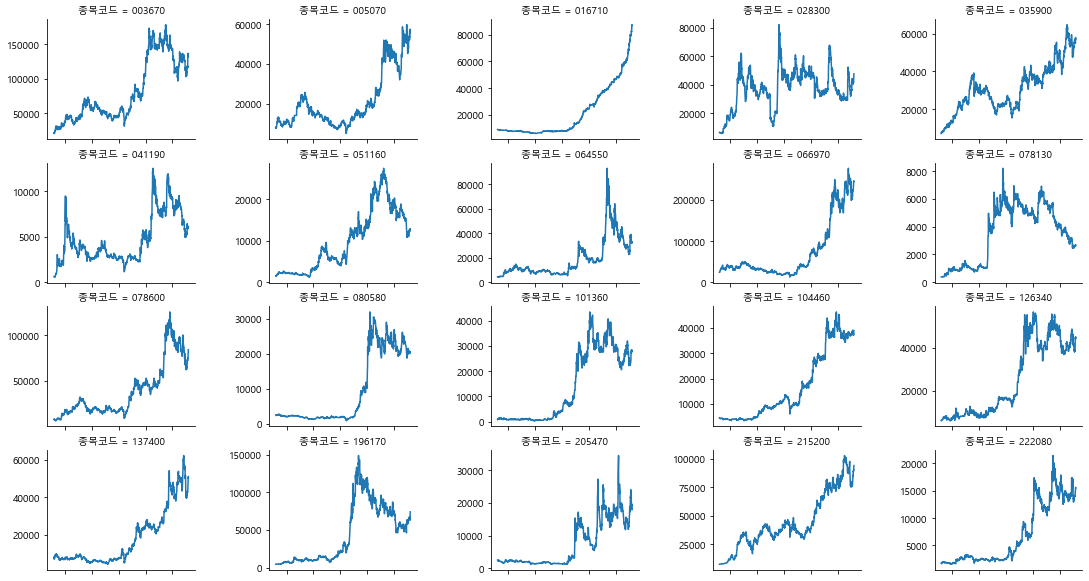

In [75]:
price_momentum = kor_price[kor_price['종목코드'].isin(
    data_bind.loc[momentum_rank <= 20, '종목코드'])]

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
g = sns.relplot(data=price_momentum,
                x='날짜',
                y='종가',
                col='종목코드',
                col_wrap=5,
                kind='line',
                facet_kws={
                    'sharey': False,
                    'sharex': True
                })
g.set(xticklabels=[])
g.set(xlabel=None)
g.set(ylabel=None)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()